Molecular dynamics as a testing ground for thermodynamics




In [47]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
sp.init_printing()

t = sp.symbols('t')
k, m = sp.symbols('k m', real=True, positive=True)
x = sp.Function('x')(t)
v = sp.Function('v')(t)

ω = sp.sqrt(k/m)

x.diff(t), v.diff(t)
Eq1 = sp.Eq(x.diff(t), v)
Eq2 = sp.Eq(m * v.diff(t), -k * x)
# solve the differential equation
sol = sp.dsolve([Eq1, Eq2]) # can give ics here
xsol = sol[0].rhs
# put xsol in complex exponential form
sol
# initial condtions x(0) = 1, v(0) = 0
C1, C2 = sp.symbols('C1 C2')
ics = [sp.Eq(xsol.subs(t, 0), 1), sp.Eq(xsol.diff(t).subs(t, 0), 0)]
ics
solved_ics = sp.solve(ics)
solved_ics
ics

In [30]:
xsol.func, xsol.args

(sympy.core.add.Add,
 (C1*sqrt(m)*sin(sqrt(k)*t/sqrt(m))/sqrt(k),
  C2*sqrt(m)*cos(sqrt(k)*t/sqrt(m))/sqrt(k)))

In [43]:
sp.Expr.__match_args__ = ('func', 'args')
E = sp.Expr
match xsol:
    case E(sp.Add, (E(sp.Mul, args), t2)):
        print(args)

(C1, 1/sqrt(k), sqrt(m), sin(sqrt(k)*t/sqrt(m)))


In [41]:
sp.srepr(xsol)

"Add(Mul(Symbol('C1'), Pow(Symbol('k', real=True, positive=True), Rational(-1, 2)), Pow(Symbol('m', real=True, positive=True), Rational(1, 2)), sin(Mul(Pow(Symbol('k', real=True, positive=True), Rational(1, 2)), Pow(Symbol('m', real=True, positive=True), Rational(-1, 2)), Symbol('t')))), Mul(Symbol('C2'), Pow(Symbol('k', real=True, positive=True), Rational(-1, 2)), Pow(Symbol('m', real=True, positive=True), Rational(1, 2)), cos(Mul(Pow(Symbol('k', real=True, positive=True), Rational(1, 2)), Pow(Symbol('m', real=True, positive=True), Rational(-1, 2)), Symbol('t')))))"

In [29]:
dir(xsol)

['__abs__',
 '__add__',
 '__class__',
 '__complex__',
 '__delattr__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__le__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmod__',
 '__rmul__',
 '__round__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__sympy__',
 '__truediv__',
 '__trunc__',
 '_add_handler',
 '_args',
 '_args_type',
 '_assumptions',
 '_combine_inverse',
 '_compare_pretty',
 '_constructor_postprocessor_mapping',
 '_diff_wrt',
 '_eval_adjoint',
 '_eval_as_leading_term',
 '_eval_conjugate',
 '_eval_derivative',
 '_eval_derivative_matrix_l

In [118]:
from numba import jit, njit, float64, int64

In [102]:
@njit
def nsho(x0,v0):

    x = x0
    v = v0
    dt = 0.1
    T = 1000000.
    N = int(T / dt)
    xs = np.empty(N)
    vs = np.empty(N)
    k = 1.
    for i in range(N):
        x += v * dt
        v += - k * x * dt
        xs[i] = x
        vs[i] = v
    return xs, vs


In [122]:
#nsho.inspect_types()
#nsho.inspect_asm()[(float64, float64)]
nsho.inspect_llvm()[(float64, float64)]

'; ModuleID = \'nsho\'\nsource_filename = "<string>"\ntarget datalayout = "e-m:e-p270:32:32-p271:32:32-p272:64:64-i64:64-f80:128-n8:16:32:64-S128"\ntarget triple = "x86_64-unknown-linux-gnu"\n\n@.const.nsho = internal constant [5 x i8] c"nsho\\00"\n@_ZN08NumbaEnv8__main__4nshoB3v10B38c8tJTIcFKzyF2ILShI4CrgQElQb6HczSBAA_3dEdd = common local_unnamed_addr global i8* null\n@".const.missing Environment: _ZN08NumbaEnv8__main__4nshoB3v10B38c8tJTIcFKzyF2ILShI4CrgQElQb6HczSBAA_3dEdd" = internal constant [98 x i8] c"missing Environment: _ZN08NumbaEnv8__main__4nshoB3v10B38c8tJTIcFKzyF2ILShI4CrgQElQb6HczSBAA_3dEdd\\00"\n@".const.`env.consts` is NULL in `read_const`" = internal constant [37 x i8] c"`env.consts` is NULL in `read_const`\\00"\n@.const.pickledata.140372018472256 = internal constant [32 x i8] c"\\80\\04\\95\\15\\00\\00\\00\\00\\00\\00\\00\\8C\\05numpy\\94\\8C\\07ndarray\\94\\93\\94."\n@.const.pickledata.140372018472256.sha1 = internal constant [20 x i8] c"\\DF\\BC\\FD\\D3\\9F\\CB&\\F4\\

In [61]:
sp.init_printing(pretty_print=False)

In [111]:
nsho(0.,1.)

(array([0.1       , 0.199     , 0.29601   , ..., 0.951227  , 0.9152572 ,
        0.87013483]),
 array([ 0.99      ,  0.9701    ,  0.940499  , ..., -0.35969798,
        -0.4512237 , -0.53823719]))

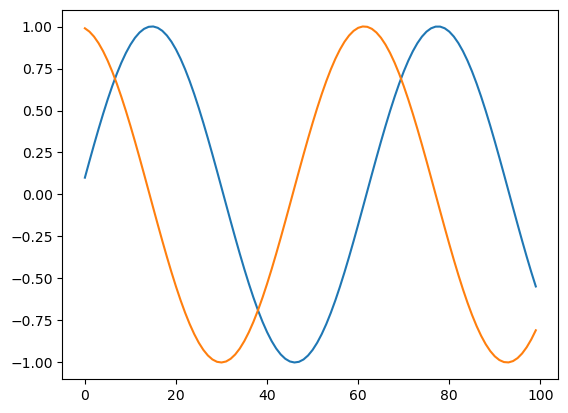

In [7]:
import matplotlib.pyplot as plt
plt.plot(xs, label='x')
plt.plot(vs, label='v')
plt.plot()


raylib https://www.raylib.com/cheatsheet/cheatsheet.html
sdl2
pygame
matplotlib animation


In [123]:
%%bash
cc ~/Documents/C/raylib/examples/examples_template.c -o /tmp/raylibexample -lraylib -lGL -lm -lpthread -ldl -lrt -lX11
/tmp/raylibexample

In [142]:
%%file /tmp/sho.c

#include "raylib.h"

int main(void)
{
    const int screenWidth = 800;
    const int screenHeight = 450;

    InitWindow(screenWidth, screenHeight, "raylib [core] example - basic window");

    // TODO: Load resources / Initialize variables at this point

    SetTargetFPS(60);
    double x = 0.0;
    double v = 1.0; 
    double dt = 1/60.;
    double k = 1.0;
    while (!WindowShouldClose())  
    {
        x += v * dt;
        v += - k * x * dt;
        double E = 0.5 * v * v + 0.5 * k * x * x;


        BeginDrawing();

            ClearBackground(RAYWHITE);

            // TODO: Draw everything that requires to be drawn at this point:
            DrawText(TextFormat("Energy: %f", E ), 0, 0, 20, LIGHTGRAY);  // Example
            //TraceLog(LOG_INFO, "Foo"); 
            //DrawText("Congrats! You created your first window!", 190, 200, 20, LIGHTGRAY);  // Example
            DrawCircle(screenWidth/2 + x*50, 200, 20, MAROON);
        EndDrawing();
        //----------------------------------------------------------------------------------
    }
    CloseWindow();        // Close window and OpenGL context
    return 0;
}


Overwriting /tmp/sho.c


In [143]:
!cc /tmp/sho.c -o /tmp/sho -lraylib -lGL -lm -lpthread -ldl -lrt -lX11 && /tmp/sho

INFO: Initializing raylib 5.1-dev
INFO: Platform backend: DESKTOP (GLFW)
INFO: Supported raylib modules:
INFO:     > rcore:..... loaded (mandatory)
INFO:     > rlgl:...... loaded (mandatory)
INFO:     > rshapes:... loaded (optional)
INFO:     > rtextures:. loaded (optional)
INFO:     > rtext:..... loaded (optional)
INFO:     > rmodels:... loaded (optional)
INFO:     > raudio:.... loaded (optional)
INFO: DISPLAY: Device initialized successfully
INFO:     > Display size: 1920 x 1200
INFO:     > Screen size:  800 x 450
INFO:     > Render size:  800 x 450
INFO:     > Viewport offsets: 0, 0
INFO: GLAD: OpenGL extensions loaded successfully
INFO: GL: Supported extensions count: 227
INFO: GL: OpenGL device information:
INFO:     > Vendor:   Intel
INFO:     > Renderer: Mesa Intel(R) Iris(R) Plus Graphics (ICL GT2)
INFO:     > Version:  4.6 (Core Profile) Mesa 23.0.4-0ubuntu1~22.04.1
INFO:     > GLSL:     4.60
INFO: GL: VAO extension detected, VAO functions loaded successfully
INFO: GL: NPOT te